<a href="https://colab.research.google.com/github/TheNovice-Coder/Framingham_HD/blob/main/framingham_HD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Modules for Data Analysis**




In [ ]:
# import common modules for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns

In [ ]:
# install the pyreadstat module
!pip install pyreadstat

# **1. Data Acquisition**

In [ ]:
# How to read in data as Dataframe ?
df_fhs=pd.read_csv('/content/heart_disease.csv')

**1.1 Scanning the dataframe**

In [ ]:
# What does the dataframe look like?
df_fhs.head()

,Age,Cholesterol,BloodPressure,BPM,Glucose,BMI,FamilyHistory,Smoker,Exercise,Alcohol,...,HeartRateMax,HeartRateMin,ChestPain,ExerciseInducedAngina,ST_Slope,Thalassemia,ECG,Sex,HeartDisease,diabetes
0,63,296,101,118,76,33.043,1,1,0,0,...,116,59,atypical,yes,upsloping,fixed_defect,normal,male,0,Diabetic
1,76,233,94,64,72,24.869,0,0,2,2,...,135,69,nonanginal,no,flat,fixed_defect,ST-T_abnormality,male,1,Non-Diabetic
2,53,262,170,96,120,38.010,0,1,0,0,...,113,74,asymptomatic,no,flat,fixed_defect,left_ventricular_hypertrophy,male,1,Diabetic
3,39,225,121,52,125,32.762,1,1,2,3,...,136,72,asymptomatic,yes,downsloping,normal,normal,male,0,Diabetic
4,67,271,163,77,142,32.205,1,1,2,0,...,130,85,typical,no,upsloping,reversible_defect,ST-T_abnormality,male,1,Non-Diabetic


In [ ]:
# Total Number of rows and columns of dataframe/dataset
df_fhs.shape

(4000, 27)

In [ ]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    4000 non-null   int64  
 1   Cholesterol            4000 non-null   int64  
 2   BloodPressure          4000 non-null   int64  
 3   BPM                    4000 non-null   int64  
 4   Glucose                4000 non-null   int64  
 5   BMI                    4000 non-null   float64
 6   FamilyHistory          4000 non-null   int64  
 7   Smoker                 4000 non-null   int64  
 8   Exercise               4000 non-null   int64  
 9   Alcohol                4000 non-null   int64  
 10  Stress                 4000 non-null   int64  
 11  Diet                   4000 non-null   int64  
 12  Education              4000 non-null   int64  
 13  Income                 4000 non-null   int64  
 14  SleepDuration          4000 non-null   float64
 15  Chol

In [ ]:
# List of categorical columns to be converted to 'category' data type
categorical_columns = ['ChestPain', 'ExerciseInducedAngina', 'ST_Slope', 'Thalassemia', 'ECG', 'Sex','diabetes']

# Convert columns to 'category' data type
for column in categorical_columns:
    df_fhs[column] = df_fhs[column].astype('category')

df_fhs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    4000 non-null   int64   
 1   Cholesterol            4000 non-null   int64   
 2   BloodPressure          4000 non-null   int64   
 3   BPM                    4000 non-null   int64   
 4   Glucose                4000 non-null   int64   
 5   BMI                    4000 non-null   float64 
 6   FamilyHistory          4000 non-null   int64   
 7   Smoker                 4000 non-null   int64   
 8   Exercise               4000 non-null   int64   
 9   Alcohol                4000 non-null   int64   
 10  Stress                 4000 non-null   int64   
 11  Diet                   4000 non-null   int64   
 12  Education              4000 non-null   int64   
 13  Income                 4000 non-null   int64   
 14  SleepDuration          4000 non-null   f

In [ ]:
df_fhs['BloodPressure']=df_fhs['BloodPressure'].astype('float')
df_fhs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    4000 non-null   int64   
 1   Cholesterol            4000 non-null   int64   
 2   BloodPressure          4000 non-null   float64 
 3   BPM                    4000 non-null   int64   
 4   Glucose                4000 non-null   int64   
 5   BMI                    4000 non-null   float64 
 6   FamilyHistory          4000 non-null   int64   
 7   Smoker                 4000 non-null   int64   
 8   Exercise               4000 non-null   int64   
 9   Alcohol                4000 non-null   int64   
 10  Stress                 4000 non-null   int64   
 11  Diet                   4000 non-null   int64   
 12  Education              4000 non-null   int64   
 13  Income                 4000 non-null   int64   
 14  SleepDuration          4000 non-null   f

In [ ]:
# basic descriptive
pd.set_option('display.float_format',lambda x:'%.3f' % x )
df_fhs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4000.000,52.139,15.799,25.000,39.000,52.000,66.000,79.000
Cholesterol,4000.000,225.032,42.905,150.000,188.000,225.000,262.000,299.000
BloodPressure,4000.000,135.110,26.118,90.000,112.000,136.000,158.000,179.000
BPM,4000.000,84.136,20.044,50.000,67.000,84.000,101.000,119.000
Glucose,4000.000,134.333,37.291,70.000,102.000,134.000,166.250,199.000
BMI,4000.000,29.228,6.297,18.006,23.923,29.339,34.473,39.997
FamilyHistory,4000.000,0.498,0.500,0.000,0.000,0.000,1.000,1.000
Smoker,4000.000,0.478,0.500,0.000,0.000,0.000,1.000,1.000
Exercise,4000.000,1.519,1.110,0.000,1.000,2.000,2.000,3.000
Alcohol,4000.000,1.472,1.110,0.000,0.000,1.000,2.000,3.000


# **2.Filtering Dataset**

In [ ]:
# to delete the ID variable
# df_fhs=df_fhs.drop(['glucose','TenYearCHD'],axis=1)

In [ ]:
df_fhs.shape

(4000, 27)

In [ ]:
# find missing values in dataframe
df_fhs.isnull()

,Age,Cholesterol,BloodPressure,BPM,Glucose,BMI,FamilyHistory,Smoker,Exercise,Alcohol,...,HeartRateMax,HeartRateMin,ChestPain,ExerciseInducedAngina,ST_Slope,Thalassemia,ECG,Sex,HeartDisease,diabetes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# count of missing value in each of the columns
df_fhs.isnull().sum()

# to get percentage of missing values of each column
# df_fhs.isnull().sum()/len(df_fhs)*100

Age                      0
Cholesterol              0
BloodPressure            0
BPM                      0
Glucose                  0
BMI                      0
FamilyHistory            0
Smoker                   0
Exercise                 0
Alcohol                  0
Stress                   0
Diet                     0
Education                0
Income                   0
SleepDuration            0
CholesterolRatio         0
HeartRateVariability     0
HeartRateMax             0
HeartRateMin             0
ChestPain                0
ExerciseInducedAngina    0
ST_Slope                 0
Thalassemia              0
ECG                      0
Sex                      0
HeartDisease             0
diabetes                 0
dtype: int64

### **2.1 Visual plot of missing values**

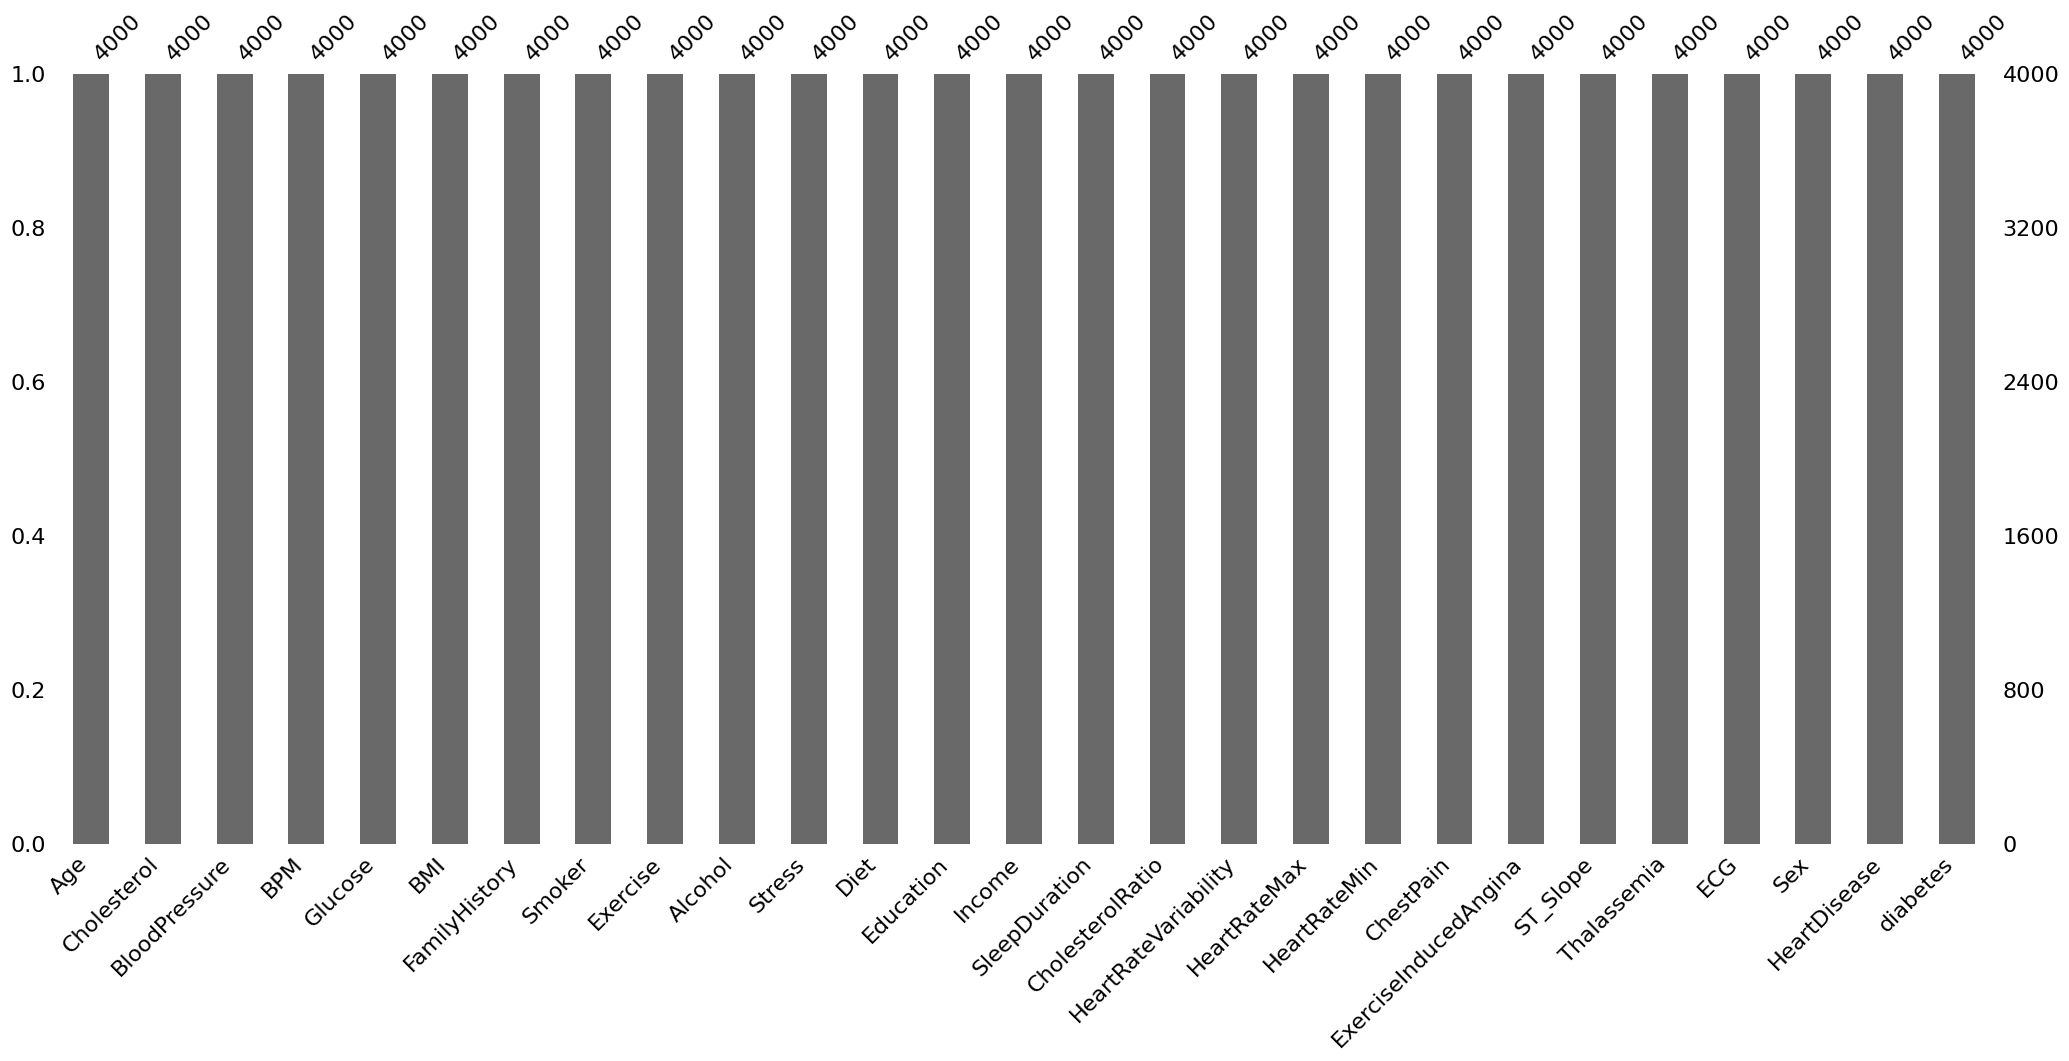

In [ ]:
import missingno as mnso
mnso.bar(df_fhs)
plt.show()

### **2.2 Dealing with missing values.**

In [ ]:
# Replace missing values of columns with mean of that column
# df_fhs['totChol']=df_fhs['totChol'].fillna(df_fhs['totChol'].mean())


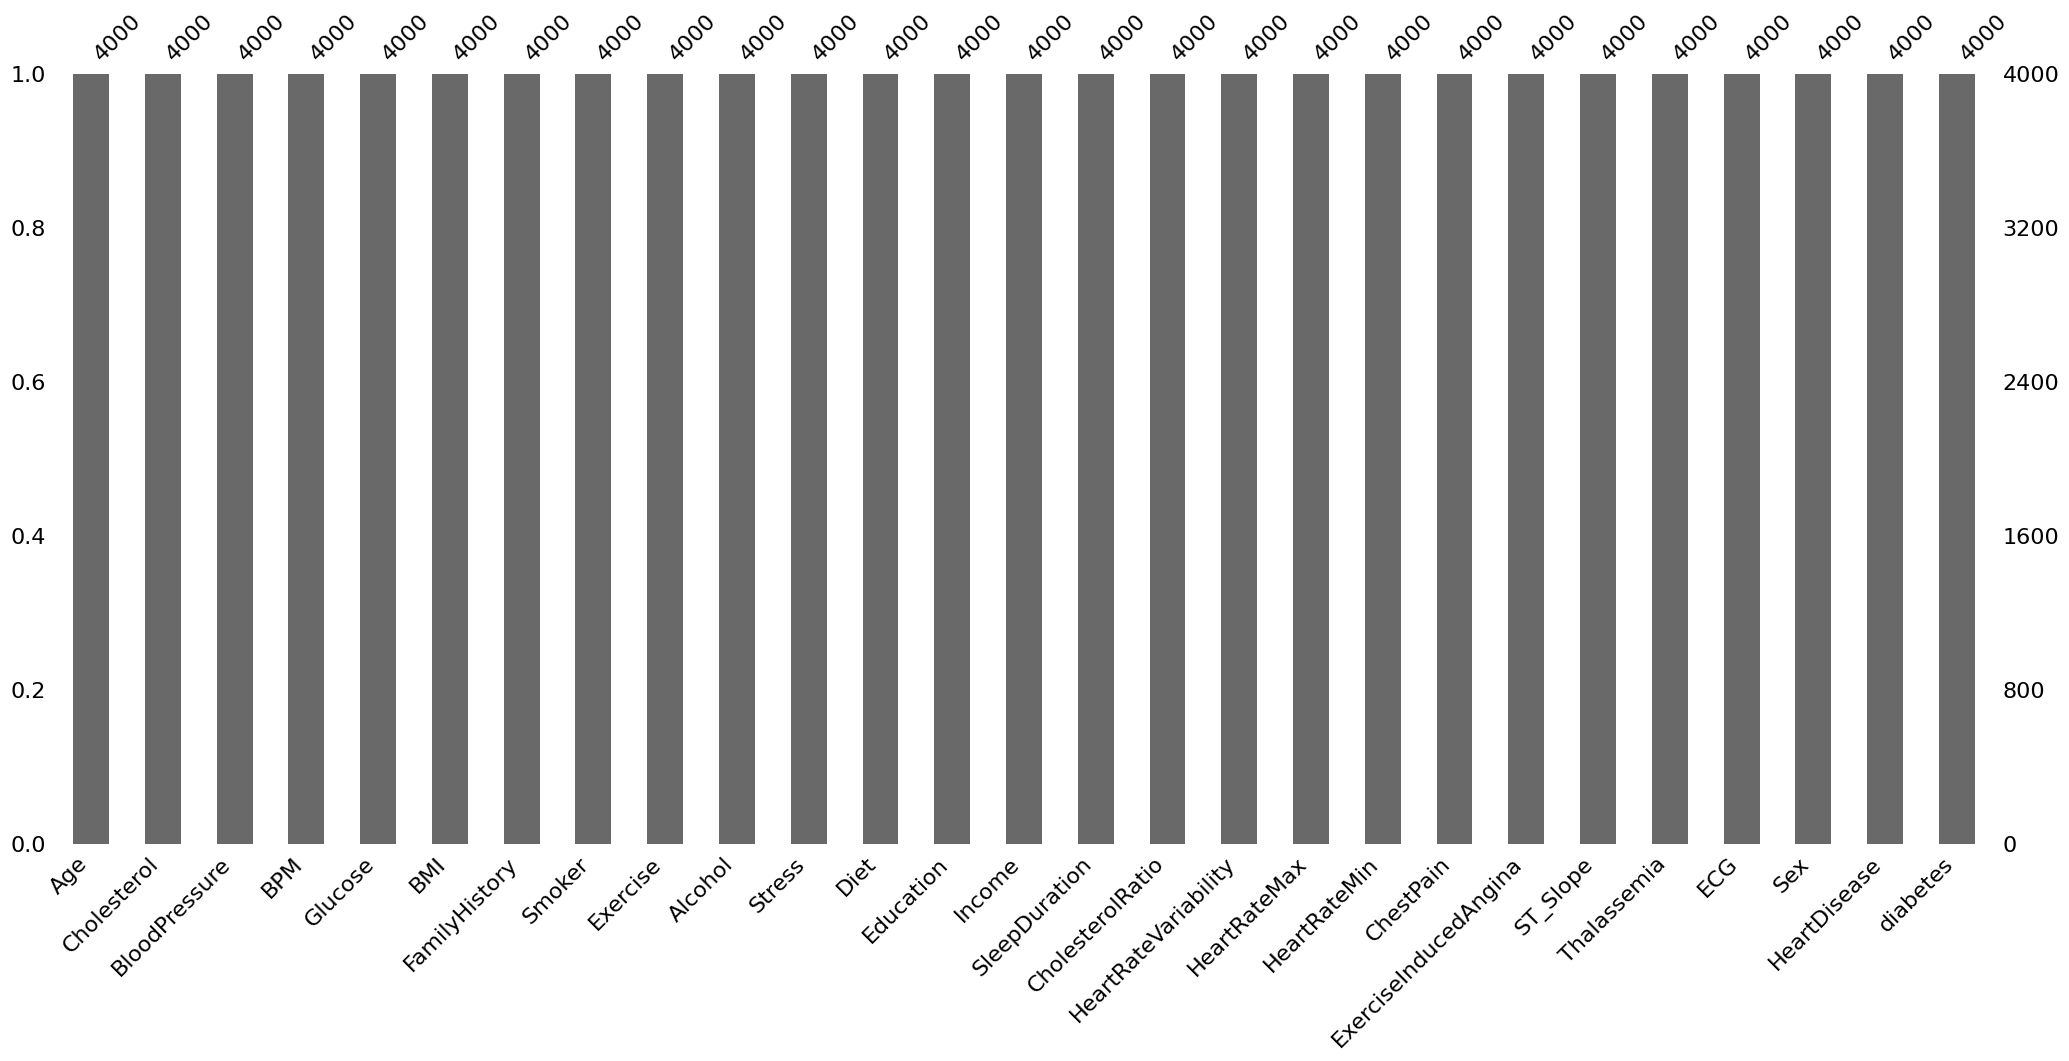

In [ ]:
# After removing missing values
import missingno as mnso
mnso.bar(df_fhs)
plt.show()

In [ ]:
# drop rows with >10% missing values
df_fhs=df_fhs.dropna()

In [ ]:
# to get percentage of missing values of each column
df_fhs.isnull().sum()/len(df_fhs)*100

Age                     0.000
Cholesterol             0.000
BloodPressure           0.000
BPM                     0.000
Glucose                 0.000
BMI                     0.000
FamilyHistory           0.000
Smoker                  0.000
Exercise                0.000
Alcohol                 0.000
Stress                  0.000
Diet                    0.000
Education               0.000
Income                  0.000
SleepDuration           0.000
CholesterolRatio        0.000
HeartRateVariability    0.000
HeartRateMax            0.000
HeartRateMin            0.000
ChestPain               0.000
ExerciseInducedAngina   0.000
ST_Slope                0.000
Thalassemia             0.000
ECG                     0.000
Sex                     0.000
HeartDisease            0.000
diabetes                0.000
dtype: float64

### **2.3 Check for Duplicates**

In [ ]:
df_fhs.duplicated().sum()

0

In [ ]:
# Remove duplicate values
df_fhs.drop_duplicates(['BMI'])


,Age,Cholesterol,BloodPressure,BPM,Glucose,BMI,FamilyHistory,Smoker,Exercise,Alcohol,...,HeartRateMax,HeartRateMin,ChestPain,ExerciseInducedAngina,ST_Slope,Thalassemia,ECG,Sex,HeartDisease,diabetes
0,63,296,101.000,118,76,33.043,1,1,0,0,...,116,59,atypical,yes,upsloping,fixed_defect,normal,male,0,Diabetic
1,76,233,94.000,64,72,24.869,0,0,2,2,...,135,69,nonanginal,no,flat,fixed_defect,ST-T_abnormality,male,1,Non-Diabetic
2,53,262,170.000,96,120,38.010,0,1,0,0,...,113,74,asymptomatic,no,flat,fixed_defect,left_ventricular_hypertrophy,male,1,Diabetic
3,39,225,121.000,52,125,32.762,1,1,2,3,...,136,72,asymptomatic,yes,downsloping,normal,normal,male,0,Diabetic
4,67,271,163.000,77,142,32.205,1,1,2,0,...,130,85,typical,no,upsloping,reversible_defect,ST-T_abnormality,male,1,Non-Diabetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,54,281,106.000,58,155,38.494,0,1,2,1,...,176,40,nonanginal,no,upsloping,fixed_defect,normal,male,0,Diabetic
3996,57,289,152.000,51,191,32.729,0,0,2,1,...,185,67,nonanginal,no,downsloping,fixed_defect,ST-T_abnormality,male,0,Diabetic
3997,60,178,144.000,112,139,38.065,1,1,0,0,...,142,61,nonanginal,no,upsloping,normal,left_ventricular_hypertrophy,male,0,Non-Diabetic
3998,42,284,112.000,100,177,39.391,0,0,2,1,...,147,71,atypical,no,upsloping,normal,normal,male,1,Diabetic


# **3. Data Transformation**

In [ ]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    4000 non-null   int64   
 1   Cholesterol            4000 non-null   int64   
 2   BloodPressure          4000 non-null   float64 
 3   BPM                    4000 non-null   int64   
 4   Glucose                4000 non-null   int64   
 5   BMI                    4000 non-null   float64 
 6   FamilyHistory          4000 non-null   int64   
 7   Smoker                 4000 non-null   int64   
 8   Exercise               4000 non-null   int64   
 9   Alcohol                4000 non-null   int64   
 10  Stress                 4000 non-null   int64   
 11  Diet                   4000 non-null   int64   
 12  Education              4000 non-null   int64   
 13  Income                 4000 non-null   int64   
 14  SleepDuration          4000 non-null   f

### **3.1 Unique values of column**

In [ ]:
# what are the unique value(i.e values used in that column) of a column
df_fhs['Smoker'].unique()

array([1, 0])

In [ ]:
# number of values in each category of the unique value of column
df_fhs['Smoker'].value_counts()

# percentage of values
# df_fhs['diabetes'].value_counts(normalize=True)

0    2087
1    1913
Name: Smoker, dtype: int64

### **3.2 Transform text to integers and vice-versa**

In [ ]:
# specify column and its values to be replaced

# below is text to integer
df_fhs['Smoker']=df_fhs['Smoker'].replace(['Non-Smoker','Smoker'],[0,1])

# below is integer to text
# df_fhs['Smoker']=df_fhs['Smoker'].replace([0,1],['Non-Smoker','Smoker'])

df_fhs['Smoker'].value_counts()

0    2087
1    1913
Name: Smoker, dtype: int64

3.3

In [ ]:
# binary values representing presence/absence of a category
pd.get_dummies(df_fhs['Smoker'])

,0,1
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
3995,0,1
3996,1,0
3997,0,1
3998,1,0


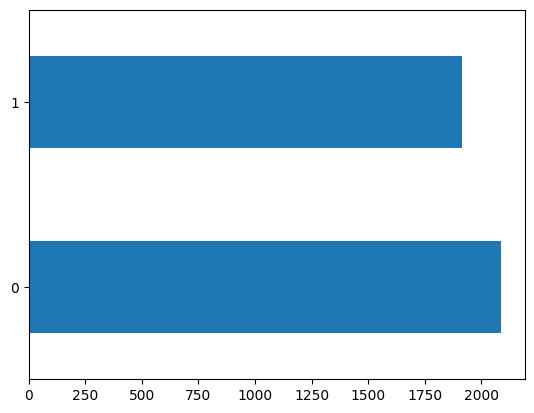

In [ ]:
# visual representation of unique values (ie. categories) of column diabetes
var1=df_fhs['Smoker'].value_counts().plot(kind='barh')

# **4. Data Exploration**

In [ ]:
df_fhs.groupby('Age').mean()

<ipython-input-112-9ca6a112bb16>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_fhs.groupby('Age').mean()


,Cholesterol,BloodPressure,BPM,Glucose,BMI,FamilyHistory,Smoker,Exercise,Alcohol,Stress,Diet,Education,Income,SleepDuration,CholesterolRatio,HeartRateVariability,HeartRateMax,HeartRateMin,HeartDisease
Age,,,,,,,,,,,,,,,,,,,
25,216.206,132.956,84.956,134.912,30.118,0.529,0.515,1.676,1.691,1.794,1.603,1.588,116327.765,8.542,6.562,57.429,144.250,67.853,0.529
26,220.065,140.610,84.455,130.948,28.500,0.468,0.429,1.779,1.455,1.597,1.610,1.623,111036.636,8.357,6.555,52.404,151.805,65.883,0.494
27,225.200,137.143,85.100,133.271,29.509,0.629,0.586,1.243,1.486,1.114,1.543,1.429,116497.729,7.902,6.241,49.213,153.443,64.271,0.371
28,226.905,135.041,84.676,133.716,28.174,0.486,0.500,1.459,1.473,1.459,1.257,1.243,107066.757,8.265,6.716,56.327,150.000,65.635,0.405
29,226.708,137.583,86.083,140.222,29.082,0.514,0.472,1.403,1.611,1.514,1.417,1.514,120331.931,8.035,6.337,53.662,153.583,65.333,0.458
30,223.514,141.203,86.203,129.189,28.820,0.405,0.500,1.500,1.351,1.270,1.527,1.500,112797.135,7.442,6.497,49.666,143.568,67.500,0.500
31,227.196,127.857,81.518,130.911,28.807,0.446,0.464,1.536,1.429,1.464,1.696,1.304,117825.946,8.190,6.507,62.817,147.893,63.768,0.375
32,226.791,136.174,84.919,134.698,29.711,0.477,0.488,1.733,1.535,1.523,1.407,1.547,106086.349,7.818,6.411,58.675,149.605,63.081,0.488
33,221.743,133.414,83.486,133.114,29.193,0.543,0.429,1.286,1.200,1.786,1.557,1.557,109468.643,8.075,6.408,51.381,148.929,63.586,0.471


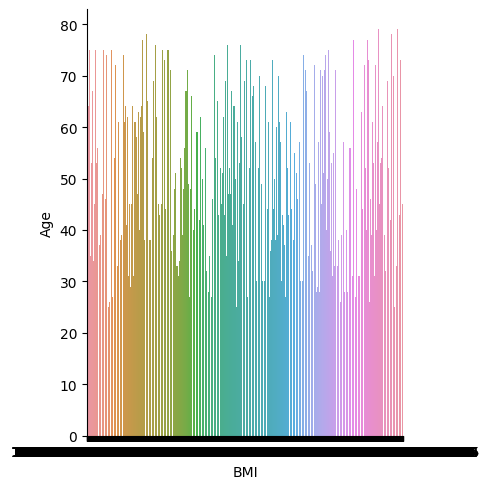

In [ ]:
# df_fhs.groupby('diabetes')['BMI'].mean().plot(kind='bar')
sns.catplot(data=df_fhs,x='BMI',y='Age',kind='bar')

### **Separating Categorical variables**

In [ ]:
fhs_cat=df_fhs.select_dtypes(include=['category'])
fhs_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ChestPain              4000 non-null   category
 1   ExerciseInducedAngina  4000 non-null   category
 2   ST_Slope               4000 non-null   category
 3   Thalassemia            4000 non-null   category
 4   ECG                    4000 non-null   category
 5   Sex                    4000 non-null   category
 6   diabetes               4000 non-null   category
dtypes: category(7)
memory usage: 28.4 KB


In [ ]:
# drop the unnecessary variable
fhs_cat=fhs_cat.drop(['ExerciseInducedAngina'],axis=1)
fhs_cat=fhs_cat.drop(['Sex'],axis=1)
fhs_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ChestPain    4000 non-null   category
 1   ST_Slope     4000 non-null   category
 2   Thalassemia  4000 non-null   category
 3   ECG          4000 non-null   category
 4   diabetes     4000 non-null   category
dtypes: category(5)
memory usage: 20.4 KB


In [ ]:
# Assigned the entire data frame to a separate data frame
col_int=df_fhs.nunique().reset_index()
col_int

,index,0
0,Age,55
1,Cholesterol,150
2,BloodPressure,90
3,BPM,70
4,Glucose,130
5,BMI,4000
6,FamilyHistory,2
7,Smoker,2
8,Exercise,4
9,Alcohol,4


In [ ]:
# changed all the data type to integer
col_int.columns=['features','categories']
col_int ['categories']=col_int['categories'].astype('int64')

In [ ]:
# sort columns based on the number of unique values
col_int=col_int.sort_values(by='categories')
col_int=col_int[col_int.categories<10]
col_int.features.values

array(['diabetes', 'Sex', 'ExerciseInducedAngina', 'FamilyHistory',
       'Smoker', 'HeartDisease', 'ECG', 'Thalassemia', 'ST_Slope',
       'Exercise', 'Alcohol', 'Stress', 'Diet', 'Education', 'ChestPain'],
      dtype=object)

In [ ]:
# display subset of integer-type categorical type
fhs_cat=df_fhs[col_int.features.values]
fhs_cat

,diabetes,Sex,ExerciseInducedAngina,FamilyHistory,Smoker,HeartDisease,ECG,Thalassemia,ST_Slope,Exercise,Alcohol,Stress,Diet,Education,ChestPain
0,Diabetic,male,yes,1,1,0,normal,fixed_defect,upsloping,0,0,3,2,3,atypical
1,Non-Diabetic,male,no,0,0,1,ST-T_abnormality,fixed_defect,flat,2,2,0,2,3,nonanginal
2,Diabetic,male,no,0,1,1,left_ventricular_hypertrophy,fixed_defect,flat,0,0,0,0,3,asymptomatic
3,Diabetic,male,yes,1,1,0,normal,normal,downsloping,2,3,0,0,3,asymptomatic
4,Non-Diabetic,male,no,1,1,1,ST-T_abnormality,reversible_defect,upsloping,2,0,2,2,1,typical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Diabetic,male,no,0,1,0,normal,fixed_defect,upsloping,2,1,0,3,3,nonanginal
3996,Diabetic,male,no,0,0,0,ST-T_abnormality,fixed_defect,downsloping,2,1,2,2,0,nonanginal
3997,Non-Diabetic,male,no,1,1,0,left_ventricular_hypertrophy,normal,upsloping,0,0,3,3,2,nonanginal
3998,Diabetic,male,no,0,0,1,normal,normal,upsloping,2,1,0,1,3,atypical


### **Continuous variables**

In [ ]:
# variables that are labeled as floats
fhs_cont=df_fhs.select_dtypes(include=['float'])
fhs_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BloodPressure         4000 non-null   float64
 1   BMI                   4000 non-null   float64
 2   SleepDuration         4000 non-null   float64
 3   CholesterolRatio      4000 non-null   float64
 4   HeartRateVariability  4000 non-null   float64
dtypes: float64(5)
memory usage: 156.4 KB


In [ ]:
# # drop the unnecessary variable
# fhs_cont=fhs_cont.drop(['education'],axis=1)
# fhs_cont.info()

In [ ]:
# generate correlation among variables
fhs_cont.corr()

,BloodPressure,BMI,SleepDuration,CholesterolRatio,HeartRateVariability
BloodPressure,1.000,0.021,0.006,-0.021,0.025
BMI,0.021,1.000,-0.026,0.003,0.005
SleepDuration,0.006,-0.026,1.000,0.042,-0.011
CholesterolRatio,-0.021,0.003,0.042,1.000,0.011
HeartRateVariability,0.025,0.005,-0.011,0.011,1.000


# **5.Generate Machine Learning Model**

### **5.1 The imbalance in the target variable**

In [ ]:
df_fhs['HeartDisease'].value_counts()

0    2061
1    1939
Name: HeartDisease, dtype: int64

<Axes: ylabel='diabetes'>

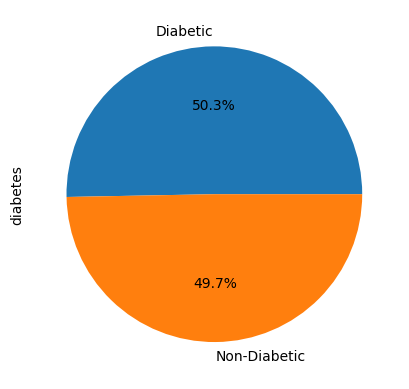

In [ ]:
df_fhs['diabetes'].value_counts().plot(kind='pie', autopct='%1.1f%%')

### **1st Split ( X and Y)**

In [ ]:
fhs_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BloodPressure         4000 non-null   float64
 1   BMI                   4000 non-null   float64
 2   SleepDuration         4000 non-null   float64
 3   CholesterolRatio      4000 non-null   float64
 4   HeartRateVariability  4000 non-null   float64
dtypes: float64(5)
memory usage: 156.4 KB


In [ ]:
# input or predictor variable is x.
# x is of shape Matrix containing the data which have to be sampled.

x=fhs_cont
x.shape

(4000, 5)

In [ ]:
# outcome variable is y.
# y : array-like of shape (n_samples,)
#     Corresponding label for each sample in X.

y=df_fhs['HeartDisease']
y.shape

(4000,)

## **The Synthetic Minority Oversampling (SMOTE)**

---



*   *Smoting generates synthetic observations for minority class/category.*




In [ ]:
# load the SMOTE module
from imblearn.over_sampling import SMOTE

In [ ]:
# create an instance of the SMOTE algorithm and assign it to variable os.

os=SMOTE(random_state=0)
x_os,y_os=os.fit_resample(x,y)


In [ ]:
# dimensions of matrices
x_os.shape,y_os.shape

((4122, 5), (4122,))

In [ ]:
# now the distribution of categorical variable is equal (refer 5.1)
y_os.value_counts()


0    2061
1    2061
Name: HeartDisease, dtype: int64

In [ ]:
df_os=pd.DataFrame(x_os)
df_os['HeartDisease']=y_os

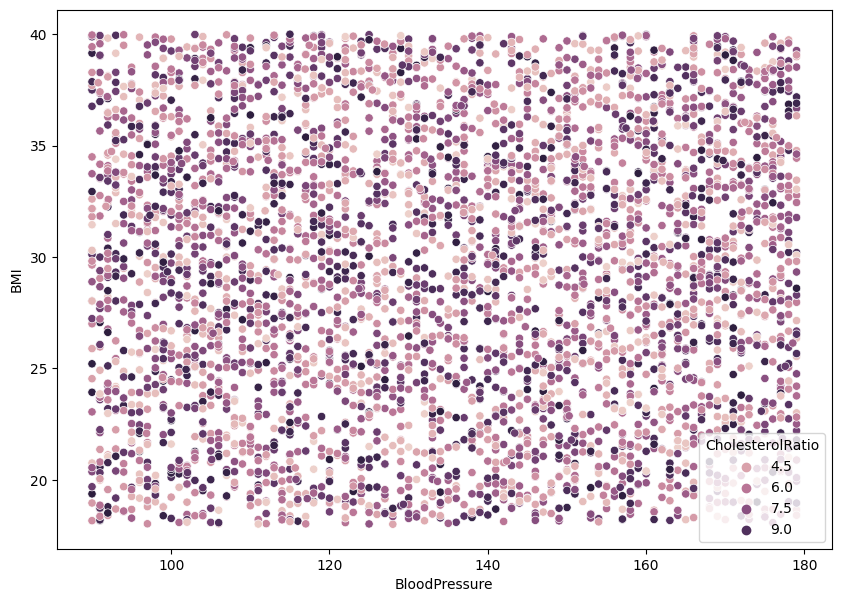

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_os,y='BMI',x='BloodPressure',hue='CholesterolRatio')
plt.show()

### **2nd Split (Train and Test)**

In [ ]:
from sklearn.model_selection import train_test_split
# Split data into train and test
x_train , x_test , y_train , y_test = train_test_split(x_os,y_os,test_size=0.3,random_state=0)

## Scaling the Values

In [ ]:
# scaling train features for optimal model performance
from sklearn.preprocessing import StandardScaler
sc_train=StandardScaler().fit(x_train)
x_train_sc=sc_train.transform(x_train)

In [ ]:
# snapshot of the transformed data
np.set_printoptions(precision=3)
print(x_train_sc[0:5,:])

[[ 0.665  1.328  0.939 -1.059 -0.718  0.986  0.986]
 [-0.944  0.01   1.155 -0.796  1.338 -1.014 -1.014]
 [-1.289 -0.344  1.539  1.232 -0.608  0.986  0.986]
 [-1.365  1.536  1.345 -1.475 -1.552  0.986  0.986]
 [ 1.048 -0.561 -1.046 -0.525  0.524  0.986  0.986]]


# **Training the model**

In [ ]:
# creating an instance of the logistic regression model
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression(solver='liblinear')

In [ ]:
# using the train data to train the model features
model_lr.fit(x_train_sc,y_train)

LogisticRegression(solver='liblinear')

# **Testing the Model**

In [ ]:
# scaling test features for optimal model performance
sc_test=StandardScaler().fit(x_test)
x_test_sc=sc_test.transform(x_test)

In [ ]:
# test the performance of model on test data
results=model_lr.score(x_test_sc,y_test)
results*100

100.0

In [ ]:
# test the performance of model on train data
results=model_lr.score(x_train_sc,y_train)
results*100

100.0

# **Model Optimization**

In [ ]:
fhs_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BloodPressure         4000 non-null   float64
 1   BMI                   4000 non-null   float64
 2   SleepDuration         4000 non-null   float64
 3   CholesterolRatio      4000 non-null   float64
 4   HeartRateVariability  4000 non-null   float64
dtypes: float64(5)
memory usage: 156.4 KB


<Axes: title={'center': 'Correlation with Age'}>

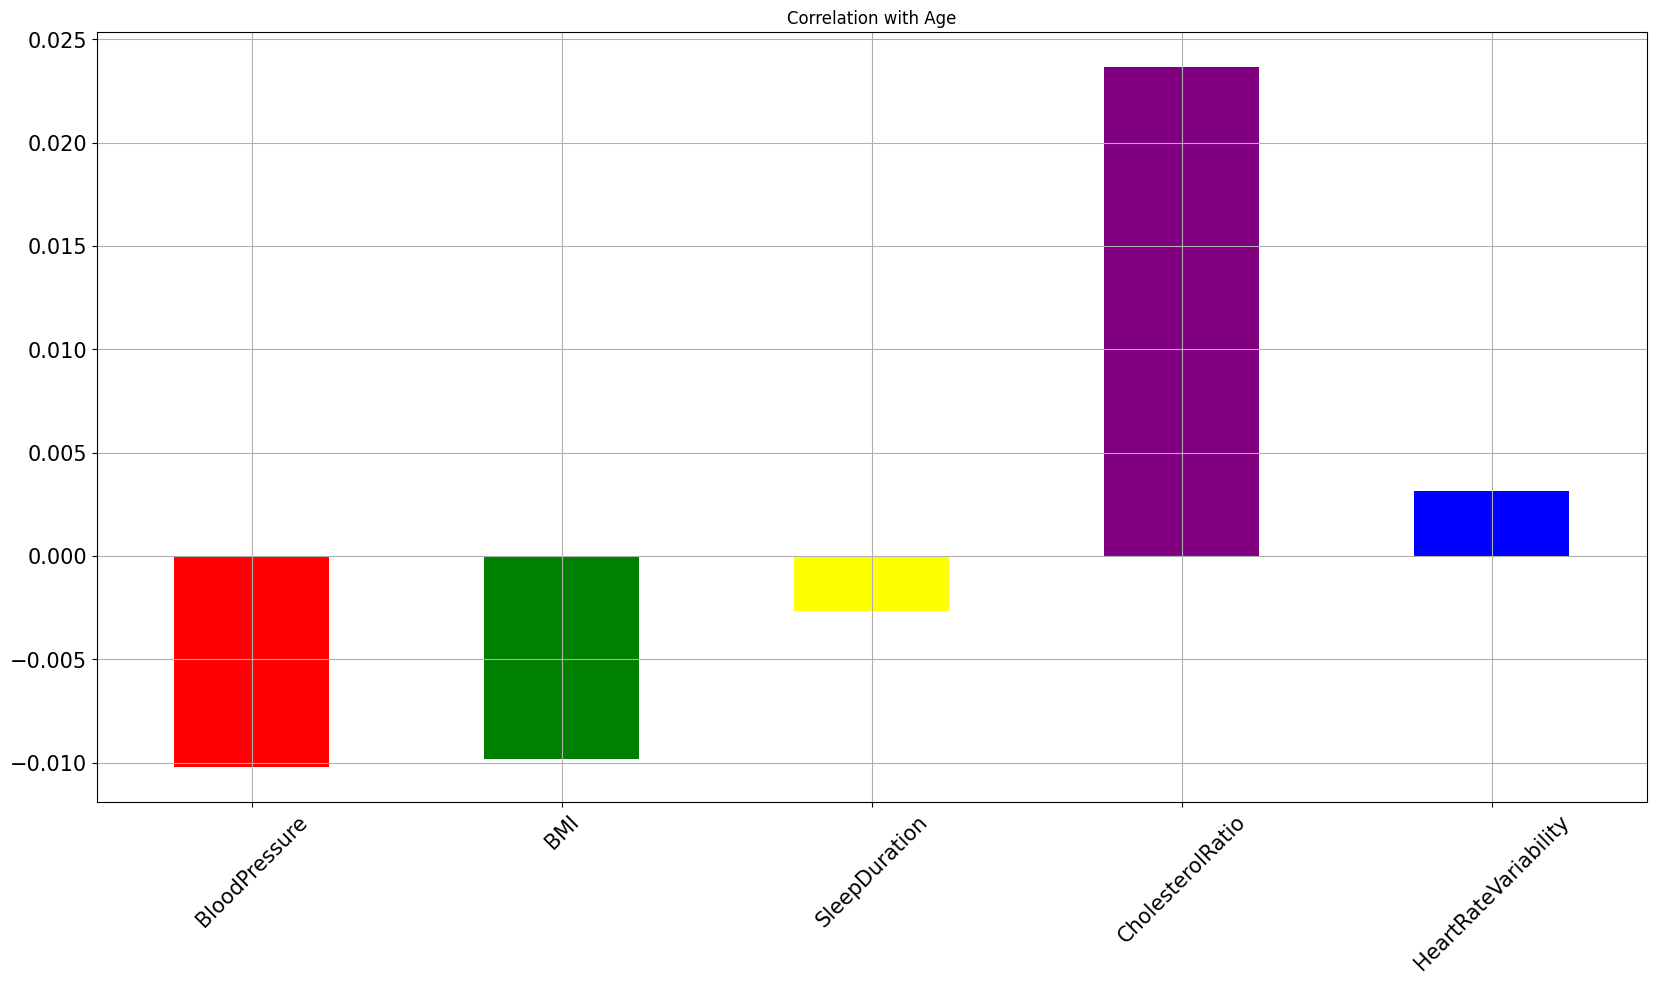

In [ ]:
c=['red','green','yellow','purple','blue','orange','cyan']
fhs_cont.corrwith(df_fhs['Age']).plot.bar(figsize=(20,10),
                                              title='Correlation with Age',
                                              fontsize=15,rot=45,grid=True,color=c)

# **Cross Validation**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10,  random_state=7,shuffle=True)
lr_2=LogisticRegression(solver='liblinear')


In [ ]:
results = cross_val_score(lr_2, x_train_sc, y_train, cv=kfold)
results

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
results.mean()*100.0, results.std()*100

(100.0, 0.0)

In [ ]:
# logistic regression and CrossValidation with 'log_loss' metric
kfold = KFold(n_splits=10,  random_state=7,shuffle=True)
lr_3=LogisticRegression(solver='liblinear')
results = cross_val_score(lr_3, x_train_sc, y_train, cv=kfold,scoring='neg_log_loss')
results.mean(), results.std()

(-0.0012848190420383923, 3.524653478939587e-06)

In [ ]:
# logistic regression with Area under curve(AUC) metric
kfold = KFold(n_splits=10,  random_state=7,shuffle=True)
lr_4=LogisticRegression(solver='liblinear')
results = cross_val_score(lr_4, x_train_sc, y_train, cv=kfold,scoring='roc_auc')
print("AUC: %.3f (%.3f)" %(results.mean(), results.std()) )

AUC: 1.000 (0.000)


<Axes: >

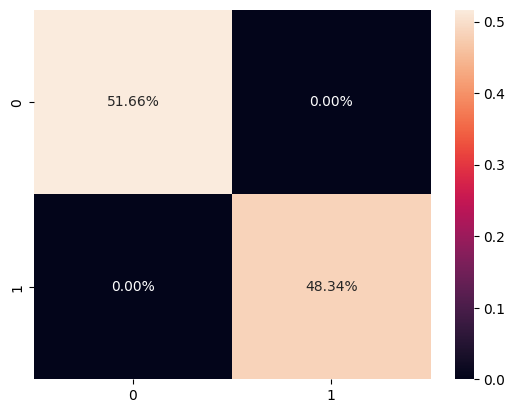

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
lr_3.fit(x_train_sc, y_train)
pred_y=lr_3.predict(x_test_sc)
matrix=confusion_matrix(y_test,pred_y)
sns.heatmap(matrix/np.sum(matrix),fmt='.2%',annot=True)

In [ ]:
# classification report
report=classification_report(y_test,pred_y)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       639
           1       1.00      1.00      1.00       598

    accuracy                           1.00      1237
   macro avg       1.00      1.00      1.00      1237
weighted avg       1.00      1.00      1.00      1237



In [ ]:
# List of features
features = list(fhs_cont.columns)  # Assuming fhs_cont is your DataFrame
print(features)


['BloodPressure', 'BMI', 'SleepDuration', 'CholesterolRatio', 'HeartRateVariability']


In [ ]:
# List of coefficients
coefficients=lr_3.coef_
coefficients

array([[ 3.120e-03,  1.545e-02, -3.559e-02,  1.812e-02, -9.235e-03,
         3.374e+00,  3.374e+00]])

In [ ]:
coefficients = np.array(coefficients)  # Convert the list to a NumPy array
coefficients = coefficients.ravel().tolist()  # Convert the flattened array back to a list
coefficients = coefficients[:len(features)]

coefficients

[0.003119758767822288,
 0.015449453091425952,
 -0.0355899077223731,
 0.018117986756986622,
 -0.00923493093984302]

In [ ]:

data = {"Features": features,
        "Coefficients": coefficients}

coeff_table = pd.DataFrame(data)
coeff_table = coeff_table.sort_values(by='Coefficients')
coeff_table

,Features,Coefficients
2,SleepDuration,-0.036
4,HeartRateVariability,-0.009
0,BloodPressure,0.003
1,BMI,0.015
3,CholesterolRatio,0.018


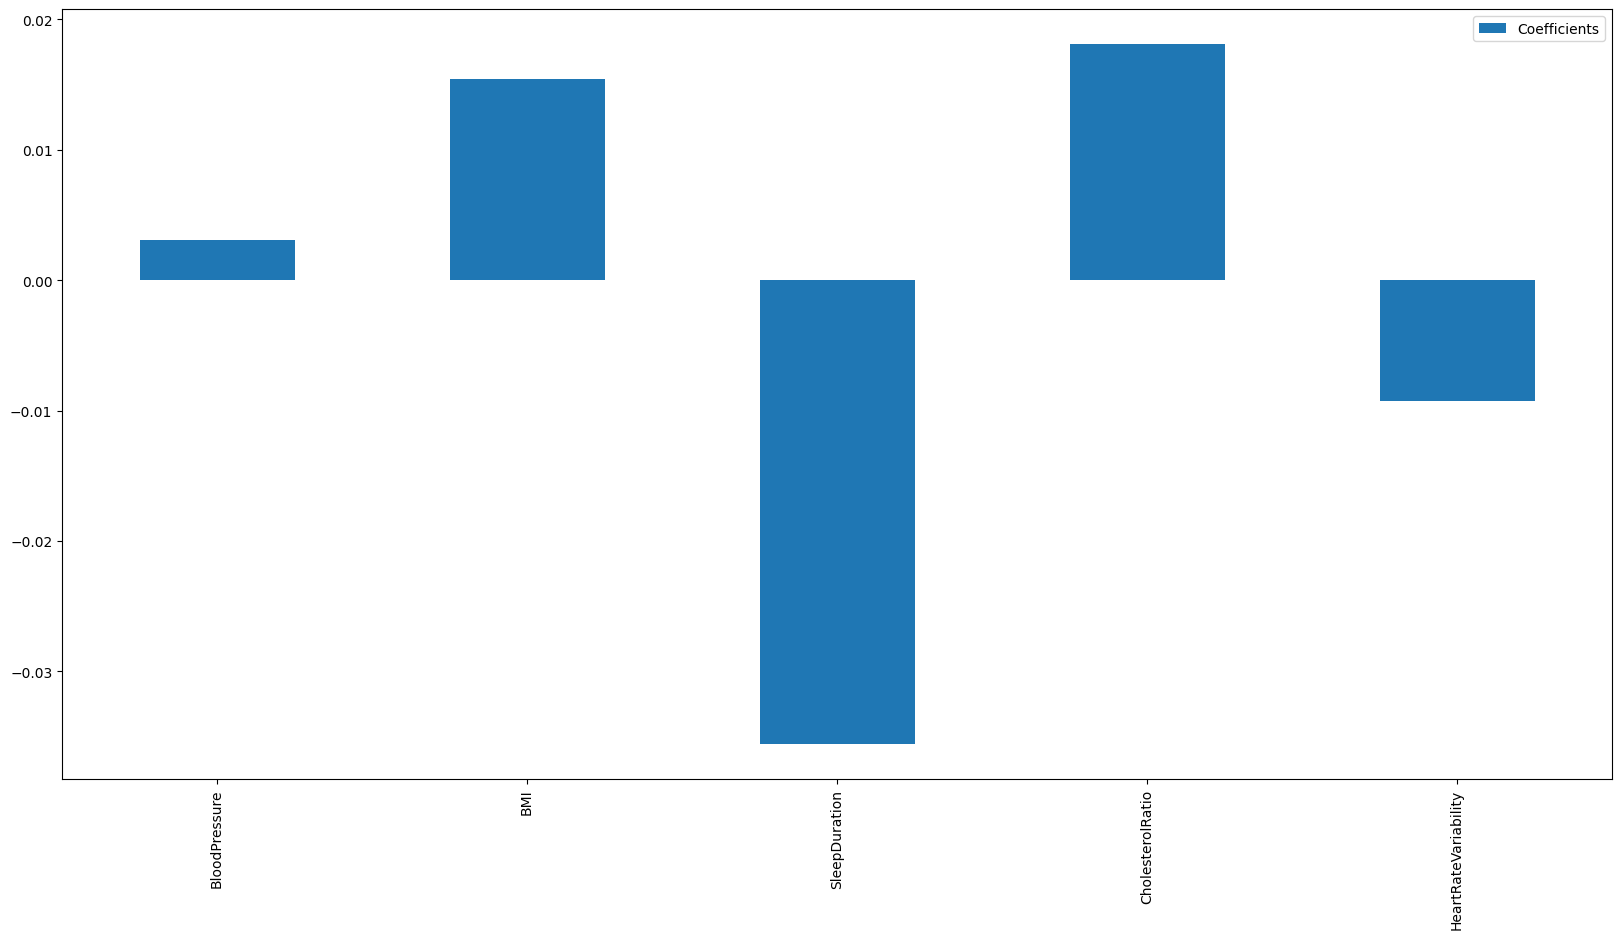

In [ ]:

data = {"Features": features,
        "Coefficients": coefficients}

coeff_table = pd.DataFrame(data)
coeff_table.plot(kind='bar', figsize=(20, 10))
plt.xticks(np.arange(0, 5), features)
plt.show()